# MAKING OLYMPIC DATA SPEAK: A Generic Exploration
<i>Did you know that the youngest Olympian ever was 10 years old when he participated, and even won a medal? (also being the youngest Olympic medalist). Or, did you know that Art Competition or Tug-of-War were Olympic sports?
Take a look into this Report, you won't regret.</i>


In this first Olympic Data Report, we will analyze a dataset that contains the information of all the athletes who competed from Athens 1896 to Rio 2016.

The idea will be to have a rough idea of the data we have, and we will make general questions, in order to try to get some interesting information. In the next releases, we will dig into sports' specific questions and insights.

In this case, the approach will be mainly looking at some data, avoiding showing code as much as possible. If you want to dig into the coding, the full report with all the python codes is available here: GitHub - VascoArizna

In the last report, Analyzing the Employees's Turnover, we paid attention to the three main aspects of Data Science: Descriptive, Predictive, and Prescriptive Analysis. In this case, we will only pay attention to the first one. We will try to ask us questions in order to find 'highsights'. Let's start de Exploration to see if we are able to find any curious data.

In [14]:
#We import the main libraries.


import pandas as pd
import numpy as np
import math

#Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import animation, rc
pd.options.mode.chained_assignment = None  # default='warn'

#This is to show the graphics and videos.
plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\ignac\AppData\Local\ffmpeg\bin\ffmpeg.exe'

#This is for the race bar-chart
import bar_chart_race as bcr

#We set the Warning Parameter
import warnings
warnings.filterwarnings('ignore')

In [15]:
url='https://raw.githubusercontent.com/vascoarizna/JIAF-MakingOlympicDataSpeak-Part1/main/dataset/athlete_events.csv'

#path1='dataset/athlete_events.csv'
olympicData=pd.read_csv(url)

# 1.Exploratory Analysis

## 1.1.Peaking on the Data

In [16]:
#Firstly we take a look on how we see the data.
olympicData.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


The data is composed in this structure. By paying attention to the columns, we can see how can we group the data, to make aggregated procedures. On the other hand, by paying attention to the type of value, what kind of operations we will have to do, or what type of Feature Engineering we will have to apply.

For example, we know that the last column, 'Medal', has three possible values:
- NaN (no medal won)
- Bronze (if the athlete won any bronze medal in that specific event in that specific sport in that Game)
- Silver (following the same logic described above)
- Gold (idem)

Also, in this first report, we will pay attention only to Summer Olympic Games. Having this said, we will filter by 'Season' features: 'Summer' will be the value we will choose, to filter the 'Winter' Olympic Games.

## 1.2.Shape of the DataFrame

In [17]:
#Firstly we look for the shape.
olympicData.shape

(271116, 15)

- We have 271116 rows and 15 columns
- This is fantastic. Between all the Games (Summer and Winter), we are talking about 271116 participants from 1896 to 2016.

## 1.3.Info of the DataFrame

In [18]:
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


We see that the columns have their correspondent data type: ID, Age, height, weight and Year are numerical (integers and floats), and the rest are objects, which makes sense.

Also, we already identified some null values in Age, Height, Weight, and Medal. We will treat these values.

## 1.4.Statistical Description of the DataFrame

In [19]:
olympicData.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Ok. This is the first hindsight we find. The minimum registered Age in an Olympic Games is 10 years!. And the maximum is 97!

Regarding Age, we can see that the mean and the median (50%) are almost similar. This talks about a normal-like distribution. On top of that, despite we having a distance of 87 years between the minimum and maximum registered ages, we can appreciate that between the 25th and 75 percentiles (the 50 central percent of the data) we have only 7 years of distance.

Analyzing Height and Weight, from a general point of view, is almost useless, as we have to analyze them inside each sport, and in most cases, inside the respective events. 


# 2.Data Preparation/Cleaning

## 2.1.Missing Values

We are quickly checking for null values. It's understandable that some values from the 'old days' are not available. Nevertheless, if we would like to apply any Machine Learning model to predict any value, we would have to deal with the nulls by, either imputing a value (the mean for the numerical values, and the median for the categorical ones) or dropping the row.

The columns where we find nulls are these ones:

In [20]:
# Check to see if there are any missing values in our data set
olympicData.isnull().any().sort_values(ascending=False).head(5)

Age        True
Height     True
Weight     True
Medal      True
ID        False
dtype: bool

The ratio of missing values is important for all the cases, except for Age:

In [91]:
#checking for null values
nullSum=(olympicData).isnull().sum()

In [22]:
ratio=nullSum/olympicData.shape[0]
ratio.sort_values(ascending=False).head(5)

Medal     0.853262
Weight    0.231912
Height    0.221938
Age       0.034944
ID        0.000000
dtype: float64

Missing Data Summary:

- Age: 3.5% of the data has the age missing
- Height: 22.1% of the data has the Height Missing
- Weigh: 23.1% of the values are missing
- Medal: 85.3% of the values are missing. This value, however, makes sense, as most of the athletes do not win a medal.


As we said, for ML purposes, we should impute values or drop the rows. Each column should be treated in a different way:

For the case of Age, Height, and Weight, the data imputation (mean, in this case) should be of the athlete's event average, rather than from the DataFrame's total average. Why? Because usually, for the same events (for example: in Boxing, the event/category up to 75kg) the athletes tend to have a similar body structure (weight/height).

## 2.3. Label Encoding
In the case of the medals, although there is no reference, we assume that all the NaNs (NULL values) correspond to athletes who never who any medal. That is why we should LabelEncode this category into:

- 0 for NaN
- 1 for Bronze
- 2 for Silver
- 3 for Gold.

This way we would, not only get rid of the NULL values but also will have our dataset already prepare for Fitting it into an ML Model.

In [23]:
olympicData.groupby('Medal').ID.count()

Medal
Bronze    13295
Gold      13372
Silver    13116
Name: ID, dtype: int64

### 2.2.1. Medal Imputation/Label Encoder

In [24]:
#As we want to have a certain order, we will map manually

olympicData['MedalNumeric']=0
olympicData.loc[olympicData['Medal']=='Bronze','MedalNumeric']=1
olympicData.loc[olympicData['Medal']=='Silver','MedalNumeric']=2
olympicData.loc[olympicData['Medal']=='Gold','MedalNumeric']=3

### 2.2.1. Age, Height and Weight Imputation

We will do the imputation following the events

In [25]:
ageMeanEvent=olympicData.groupby('Event').Age.mean()
heightMeanEvent=olympicData.groupby('Event').Height.mean()
weightMeanEvent=olympicData.groupby('Event').Weight.mean()

ageMeanEventDic=ageMeanEvent.to_dict()
heightMeanEventDic=heightMeanEvent.to_dict()
weightMeanEventDic=weightMeanEvent.to_dict()

ageNA=olympicData['Age'].isna()
heightNA=olympicData['Height'].isna()
weightNA=olympicData['Weight'].isna()

olympicData['Height1'] = olympicData.loc[heightNA,'Event'].map(heightMeanEventDic)
olympicData['Weight1'] = olympicData.loc[weightNA,'Event'].map(weightMeanEventDic)
olympicData['Age1'] = olympicData.loc[ageNA,'Event'].map(ageMeanEventDic)


heightNotNA=olympicData['Height1'].isna()
weightNotNA=olympicData['Weight1'].isna()
ageNotNA=olympicData['Age1'].isna()

In [26]:
#I assign the non-null values that we held in Height 1 to the Null values we have in Heigh
olympicData.loc[heightNA,'Height']=olympicData.loc[~heightNotNA,'Height1']

#I assign the non-null values that we held in Height 1 to the Null values we have in Heigh
olympicData.loc[weightNA,'Weight']=olympicData.loc[~weightNotNA,'Weight1']

#I assign the non-null values that we held in Height 1 to the Null values we have in Heigh
olympicData.loc[ageNA,'Age']=olympicData.loc[~ageNotNA,'Age1']

In [27]:
#checking for null values
print("Sum of NULL values in each column. ")
nullSum=(olympicData).isnull().sum()
nullSum.sort_values(ascending=False).head(5)

Sum of NULL values in each column. 


Age1       261784
Medal      231333
Height1    213028
Weight1    212901
Weight       4660
dtype: int64

In [28]:
ratio=nullSum/olympicData.shape[0]
ratio.sort_values(ascending=False).head(6)

Age1       0.965579
Medal      0.853262
Height1    0.785745
Weight1    0.785276
Weight     0.017188
Height     0.007683
dtype: float64

Now we will do the imputation following the sports' average

In [29]:
ageMeanSport=olympicData.groupby('Sport').Age.mean()
heightMeanSport=olympicData.groupby('Sport').Height.mean()
weightMeanSport=olympicData.groupby('Sport').Weight.mean()

ageMeanSportDic=ageMeanSport.to_dict()
heightMeanSportDic=heightMeanSport.to_dict()
weightMeanSportDic=weightMeanSport.to_dict()

ageNA=olympicData['Age'].isna()
heightNA=olympicData['Height'].isna()
weightNA=olympicData['Weight'].isna()

olympicData['Height1'] = olympicData.loc[heightNA,'Sport'].map(heightMeanSportDic)
olympicData['Weight1'] = olympicData.loc[weightNA,'Sport'].map(weightMeanSportDic)
olympicData['Age1'] = olympicData.loc[ageNA,'Sport'].map(ageMeanSportDic)


heightNotNA=olympicData['Height1'].isna()
weightNotNA=olympicData['Weight1'].isna()
ageNotNA=olympicData['Age1'].isna()

In [30]:
#I assign the non-null values that we held in Height 1 to the Null values we have in Heigh
olympicData.loc[heightNA,'Height']=olympicData.loc[~heightNotNA,'Height1']

#I assign the non-null values that we held in Height 1 to the Null values we have in Heigh
olympicData.loc[weightNA,'Weight']=olympicData.loc[~weightNotNA,'Weight1']

#I assign the non-null values that we held in Height 1 to the Null values we have in Heigh
olympicData.loc[ageNA,'Age']=olympicData.loc[~ageNotNA,'Age1']

In [31]:
#We delete these temporary columns
olympicData=olympicData.drop(columns=['Age1','Weight1','Height1'])
#olympicData=olympicData.drop(columns=['Medal']) #We will keep 'Medal' as categorical, as in this case we won't apply any ML model.
# # We will also keep MedalNumerical.


In [32]:
#checking for null values
print("Sum of NULL values in each column. ")
nullSum=(olympicData).isnull().sum()
nullSum.sort_values(ascending=False).head(5)

Sum of NULL values in each column. 


Medal     231333
Weight       217
Height        99
ID             0
Name           0
dtype: int64

In [33]:
ratio=nullSum/olympicData.shape[0]
ratio.sort_values(ascending=False).head(5)

Medal     0.853262
Weight    0.000800
Height    0.000365
ID        0.000000
Name      0.000000
dtype: float64

In [34]:
# Replace NaNs in columns with the
# mean of values in the same column
olympicData['Age'].fillna(value=olympicData['Age'].mean(), inplace=True)
olympicData['Height'].fillna(value=olympicData['Height'].mean(), inplace=True)
olympicData['Weight'].fillna(value=olympicData['Weight'].mean(), inplace=True)

In [35]:
#checking for null values
print("Sum of NULL values in each column. ")
nullSum=(olympicData).isnull().sum()
nullSum.sort_values(ascending=False).head(5)

Sum of NULL values in each column. 


Medal    231333
ID            0
Name          0
Sex           0
Age           0
dtype: int64

## 2.4. ISO Codes
The NOC codes are not compatible with ISO 3166-1 alpha-3 standard. And the ISO codes are the ones we must use for interactive plotting purposes. Also, we add the continents into the dataset.

In [36]:
codeMapping = pd.read_excel('dataset/codesMapping.xls', sheet_name = 'mapping')
codeMapping=codeMapping.reset_index()
olympicDataISO =(olympicData.merge(codeMapping, left_on='NOC', right_on='IOC'))
olympicDataISO.drop(columns=['index','IOC'],inplace=True)

## 2.5. Continent Codes

In [37]:
#We will also merge with the regions (continents)

In [38]:
continent=pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

In [39]:
continent=continent.reset_index()
olympicDataISO =(olympicDataISO.merge(continent, left_on='ISO', right_on='alpha-3'))
olympicDataISO.drop(columns=['index','name','alpha-2','alpha-3','country-code','iso_3166-2','intermediate-region','region-code','sub-region-code','intermediate-region-code'],inplace=True)
olympicDataISO.rename(columns={'region':'Continent'},inplace=True)

## 2.6. Season Filtering
In this report we will only analyzing Summer Games

In [40]:
olympicDataISO=olympicDataISO[olympicDataISO.Season=='Summer']

---
# 3. QUERIES

# 3.1 Age Distribution of Participants

In [41]:
totalAgeDistribution=olympicDataISO.groupby('Age')[['Medal']].count()
totalAgeDistribution.head(5)

,Medal
Age,
10.0,1
11.0,1
12.0,6
13.0,12
14.0,68


Here we have the top 5 youngest Olympian athletes 

In [42]:
totalAgeDistribution.tail(5)

,Medal
Age,
81.0,0
84.0,0
88.0,0
96.0,0
97.0,0


In this case, we have the top 5 oldest Olympians.

Taking a look into the head (5 first rows) and the tail (5 last tails) of the Age (ordered numerically in ascending direction), we can see the maximums and the minimums.

It's interesting to see the youngest and oldest Olympians. But, now, what is even more interesting, is that the youngest athlete to participate in any Olympic Games also won a medal.

### 3.1.1 Youngest Olympic

In [43]:
# Youngest Olympian (who is also the youngest medalist)
olympicDataISO[olympicDataISO.Age==totalAgeDistribution.reset_index().Age.min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalNumeric,Country,ISO,Continent,sub-region
99108,71691,Dimitrios Loundras,M,10.0,159.0,66.0,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,1,Greece,GRC,Europe,Southern Europe


Dimitrios Loundras (6 September 1885 – 15 February 1970) was a Greek gymnast and naval officer who competed at the 1896 Summer Olympics in Athens. He was the last surviving participant of these Games.

Loundras competed in the team beams event. In that competition, Loundras was a member of the Ethnikos Gymnastikos Syllogos team that placed sixty-ninth of the sixty teams in the event, giving him a bronze medal. At 10 years 218 days he remains the youngest medalist and competitor in Olympic history.

<i>(extracted from: https://en.wikipedia.org/wiki/Dimitrios_Loundras)</i>

### 3.1.2 Oldest Olympian

In [44]:
#Oldest Olympian
olympicDataISO[olympicDataISO.Age==totalAgeDistribution.reset_index().Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalNumeric,Country,ISO,Continent,sub-region
32196,128719,John Quincy Adams Ward,M,97.0,173.369803,76.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0,United States,USA,Americas,Northern America


John Quincy Adams Ward (June 29, 1830 – May 1, 1910) was an American sculptor, whose most familiar work is his larger than life-size standing statue of George Washington on the steps of Federal Hall National Memorial in New York City.

His work was part of the sculpture event in the art competition at the 1928 Summer Olympics.

<i>(extracted from: https://en.wikipedia.org/wiki/John_Quincy_Adams_Ward)</i>

This is very curious. John Quincy Adams Ward participated in the 1928 Olympics post-mortem. So, his art participated but not him personally.

This is another interesting fact that we will explode later: the sport where the oldest Olympian participated in was Art Competitions.

### 3.1.3 Age Distribution in the Olympic History

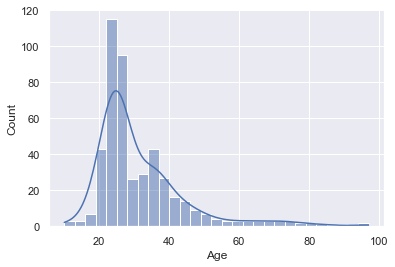

In [45]:
sns.histplot(data=totalAgeDistribution, x="Age", kde=True)
plt.show()

This graphic goes in line with our estimation from the statistics in Point 1.4. Most of the Olympians are between 21 and 29 years old.

In [46]:
totalAgeDistributionGold=olympicDataISO[olympicDataISO.Medal=='Gold'].groupby('Age')[['Medal']].count()
totalAgeDistributionGold

,Medal
Age,
13.0,6
14.0,24
15.0,50
16.0,92
17.0,155
...,...
58.0,3
59.0,2
60.0,4


Here we can see how old were the oldest Olympians to win a Gold medal, and how young were the youngest to also get the maximum reward.

### 3.1.4 Gold Medalist Age Distribution in the Olympic History

<AxesSubplot:xlabel='Age', ylabel='Count'>

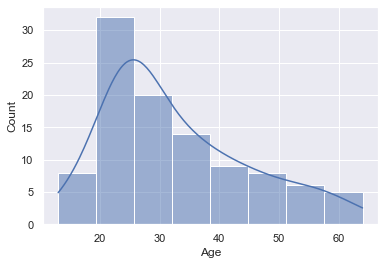

In [47]:
sns.histplot(data=totalAgeDistributionGold, x="Age", kde=True)
plt.show()

We can see that the Gold Medalist's Age concentration is mainly between 19 and 26 years.

### 3.1.5 Gold Medals for Athletes Over 50 based on Sports


Let's see in which sports Olympians older than 50 years got Gold Medals.

In [48]:
goldMedalistOver50=olympicDataISO[(olympicDataISO.Age>50)&(olympicDataISO.Medal=='Gold')].groupby('Sport')[['Medal']].count()
goldMedalistOver50

,Medal
Sport,
Archery,12
Art Competitions,8
Croquet,1
Equestrianism,18
Roque,1
Sailing,12
Shooting,11


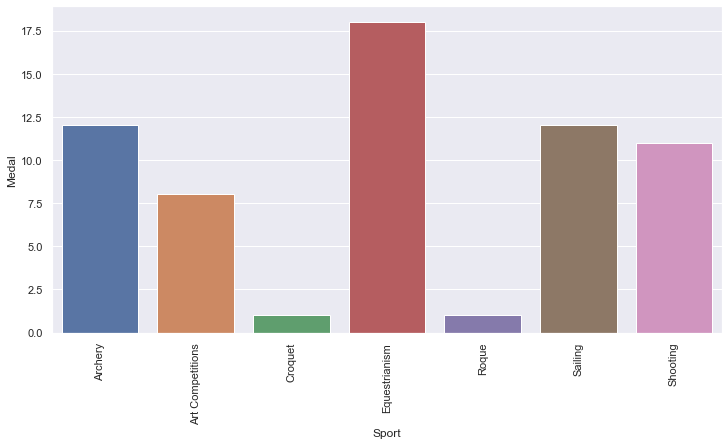

In [49]:
plt.figure(figsize=(12,6))
ax = sns.barplot( x="Sport",
                    y='Medal',
                    #hue="Sex", 
                    data=goldMedalistOver50.reset_index())
plt.xticks(rotation=90)
plt.show()

Equestrian is the sport that most has Over-50-yo-Gold-Medals. Followed by Archery, Sailling and Shooting.

## 3.2 Sports in the Olympic Games statistics
According to the statistics obtained from the dataset, there are 52 different Sports that, at least once, were disputed at the Games. These 52 Sports were composed of 651 different Events.

Some interesting sports we find in the list are

- Aeronautics
- Lacrosse
- Motorboating
- Polo
- Roque
- Art Competitions
- Tug-Of-War

### 3.2.1 How many times each sport make it in the Olympics?

In [ ]:
olympicDataISO[olympicDataISO.Season=='Summer'].groupby(['Sport'])[['Games']].nunique().sort_values('Games')

,Games
Sport,
Aeronautics,1
Rugby Sevens,1
Roque,1
Racquets,1
Motorboating,1
Ice Hockey,1
Croquet,1
Cricket,1
Jeu De Paume,1


## 3.3 Gender equality over the Olympic Games

Let's now analyze a critical point where the IOC is paying special attention and it's the Gender Equality in Sports.

In [50]:
gendercount=olympicDataISO.groupby(['Sex','Year'])[['ID']].count().reset_index()
gendercount.rename(columns={'ID':'count'},inplace=True)
gendercount.head(5)

,Sex,Year,count
0,F,1900,31
1,F,1904,16
2,F,1906,11
3,F,1908,47
4,F,1912,85


As we see, in the first Games, no women participated. They started participating in 1900, but in small numbers.

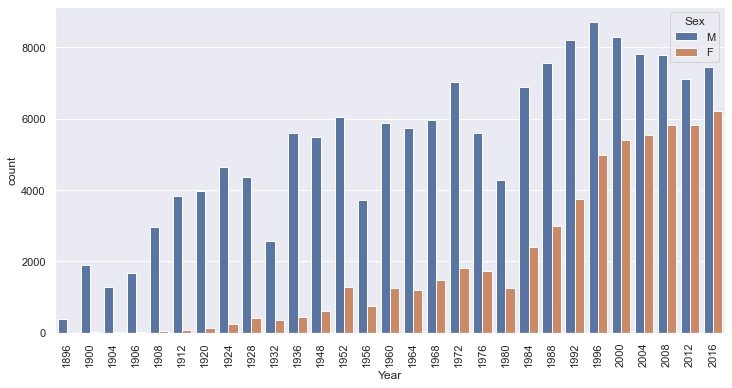

In [51]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Year", hue="Sex", data=olympicDataISO)
plt.xticks(rotation=90)
plt.show()

Through the year, women's participation has increased, reaching Olympians' gender balance at the 2020 Tokyo Olympic Games.

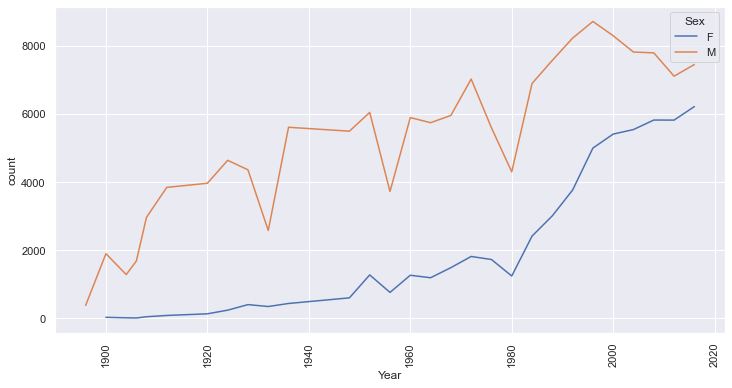

In [52]:
plt.figure(figsize=(12,6))
sns.lineplot(data=gendercount,x="Year", y='count', hue="Sex", markers= ["o","<"])
plt.xticks(rotation=90)
plt.show()

Same graphic as above, but instead of bars, this is a line plot. Here is easier to see the two things:

- The gap between the number of men and women athletes through the history of the Olympic Games.
- The increasing tendency of athletes number through the Games.


### 3.3.1 Medals per Gender per edition of the Games

The idea here will be to analyze the number of medals awarded to both genders through the Games' history. 

In [53]:
medalsPerGenderOverYears=olympicDataISO.groupby(['Year','Sex'])[['MedalNumeric']].sum()
medalsPerGenderOverYears.head(10)

MedalNumeric
Year Sex              
1896 M             310
1900 F              23
     M            1207
1904 F              24
     M             971
1906 F              12
     M             913
1908 F              33
     M            1610
1912 F              55

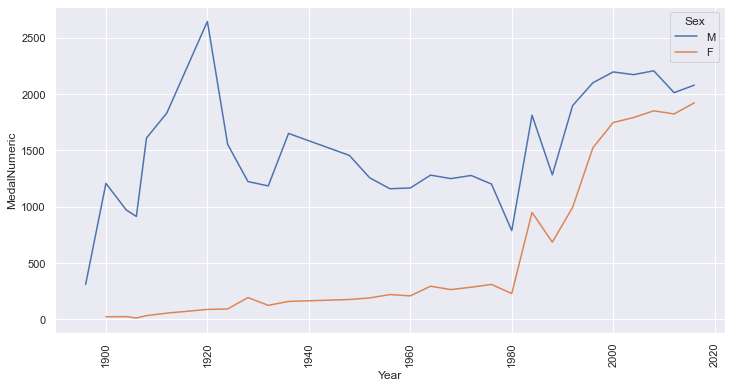

In [54]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=medalsPerGenderOverYears.reset_index(),x="Year", y='MedalNumeric', hue="Sex", markers= ["o","<"])
plt.xticks(rotation=90)
plt.show()

The biggest difference in the medals distribution per gender is found in the 1920 Antwerp Olympic Games (except the 1896 Athen Olympic Games where no women participated).

The gap will be nulled once the gender balance in events is found (without a necessary gender balance in terms of the number of athletes). 

Further analysis at 2020 Tokyo Olympic Games statistics must be done to conclude if the tendency of gender balance in the number of athletes and number of events was reached.

## 3.4 Top 10 Gold Medal Countries

Let's analyze the Top 10 Gold Medal Countries.

* Note: in this dataset, we are analyzing gross medals. This means The Men's Basketball event awards 1 Gold, 1 Silver, and 1 Bronze medal. For computing in the regular NOC's statistics, the NOC who wins the final will be computed with 1 Gold medal. However, in this dataset, we count how many athletes got a Gold medal. Having this said, and following the logic above described: here we will be counting 12 Gold Medals (the number of athletes a NOC Basketball team will have). That is why we call it 'gross count'.

In [55]:
top10 = olympicDataISO[olympicDataISO.Medal=='Gold'].groupby('NOC')[['MedalNumeric']].\
sum().sort_values('MedalNumeric',ascending=False).head(10)
top10

,MedalNumeric
NOC,
USA,7416
GBR,1908
GER,1776
ITA,1554
FRA,1395
HUN,1296
SWE,1062
AUS,1026
CHN,1002


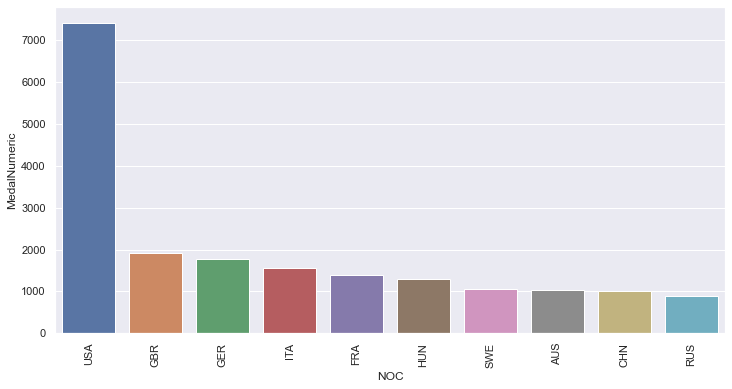

In [56]:
plt.figure(figsize=(12,6))
ax = sns.barplot( x="NOC",
                    y='MedalNumeric',
                    #hue="Sex", 
                    data=top10.reset_index())
plt.xticks(rotation=90)
plt.show()

The difference shown by the USA against the rest of the NOCs is huge.

## 3.5 Disciplines with the greatest number of Gold Medals

In [97]:
topDisciplines=olympicDataISO[olympicDataISO.Medal=='Gold'].groupby('Event')[['Medal']].count().sort_values('Medal',ascending=False)
topDisciplines=topDisciplines.head(10)
topDisciplines

,Medal
Event,
Hockey Men's Hockey,360
Football Men's Football,329
Water Polo Men's Water Polo,228
Rowing Men's Coxed Eights,226
Gymnastics Men's Team All-Around,217
Basketball Men's Basketball,198
Hockey Women's Hockey,158
Swimming Men's 4 x 200 metres Freestyle Relay,136
"Fencing Men's epee, Team",134


As we can see, the Top 10 of sports that more medals award, are team sports. These numbers make sense, as we are doing a gross count.

It's interesting to notice that the first women's sport it's in the 7th position on the top list. And, from the Top 10, we only have two women's sports in total. 

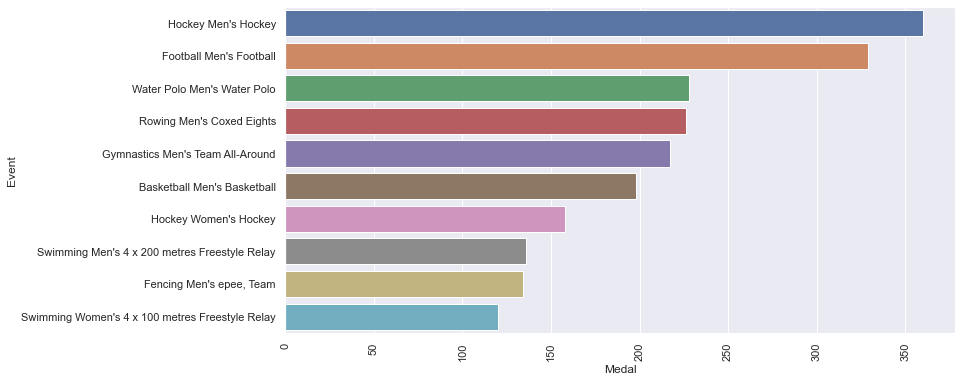

In [58]:
plt.figure(figsize=(12,6))
ax = sns.barplot( x="Medal",
                    y='Event',
                    #hue="Sex", 
                    #orient='h',
                    data=topDisciplines.reset_index())
plt.xticks(rotation=90)
plt.show()

For example, for understanding the difference in the number of medals awarded in with Event of Hockey (Men and Women), we need to contextualize how long these sports have been part of the Olympic Program:

In [ ]:
theMostEvents=olympicDataISO[(olympicDataISO.Season=='Summer')].groupby(['Event'])[['Games']].nunique().sort_values('Games',ascending=False)
theMostEvent=theMostEvents.reset_index()
quantityOfGames=theMostEvent[theMostEvent.Event.isin(topDisciplines.reset_index().Event)]
quantityOfGames

,Event,Games
17,Water Polo Men's Water Polo,27
18,Gymnastics Men's Team All-Around,27
20,Football Men's Football,27
21,Rowing Men's Coxed Eights,27
36,Swimming Men's 4 x 200 metres Freestyle Relay,25
38,"Fencing Men's epee, Team",25
58,Swimming Women's 4 x 100 metres Freestyle Relay,24
76,Hockey Men's Hockey,23
95,Basketball Men's Basketball,19
195,Hockey Women's Hockey,10


If we compare Men and Women's Hockey, we see Men's Hockey was part of the Olympic Program 23 times, while the Women's Event was only part 10 times.

Also, when comparing across sports, we would need to create a ratio, and do not compare absolute values, as each sport have their own rules in terms of team cap.

In [ ]:
theCount=olympicDataISO[(olympicDataISO.Season=='Summer') & (olympicDataISO.Event.isin(topDisciplines.reset_index().Event))].groupby(['Event','Year','NOC'])[['ID']].count()
theCount.reset_index().groupby('Event')[['ID']].mean()

,ID
Event,
Basketball Men's Basketball,11.756000
"Fencing Men's epee, Team",4.772455
Football Men's Football,14.851541
Gymnastics Men's Team All-Around,7.973978
Hockey Men's Hockey,15.524000
Hockey Women's Hockey,15.855556
Rowing Men's Coxed Eights,9.197425
Swimming Men's 4 x 200 metres Freestyle Relay,4.438272
Swimming Women's 4 x 100 metres Freestyle Relay,4.382022


Here we have the average of team members (only athletes) each sport has in their respective Olympic history.

The average stands because the sports change their respective IF rules from time to time. One of the rules is the number of athletes available to compete per Event, the number of athletes that can be in the field at the same time, the number of athletes per team, etc.

On top of that, we have NOCs that sometimes do not make the total cap number, taking fewer athletes to the competition.

## 3.6 Height vs Weight of Olympic Gold Medalists

Let's analyze Height vs Weight of Men and Women Gold Medalists through history.

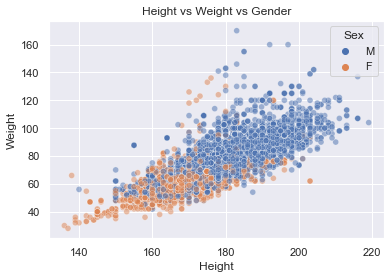

In [60]:
WeightVsHeight = olympicDataISO[olympicDataISO.Medal=='Gold'][['Weight','Height','Sex']]
sns.scatterplot(data=WeightVsHeight, x="Height", y="Weight",hue='Sex',alpha=0.5)
plt.title('Height vs Weight vs Gender')
plt.show()

In [ ]:
olympicDataISO[(olympicDataISO.Season=='Summer')].Sex.value_counts()/olympicDataISO[(olympicDataISO.Season=='Summer')].shape[0]

M    0.731465
F    0.268535
Name: Sex, dtype: float64

Despite this graphic lack of contextualization, it's interesting to see this scatter plot. One thing we can clearly see is that women then to be smaller and lighter than men. However, we need to clarify something: in this dataset, for Summer Olympic Games, we have the information of 152724 men vs 56068 women. We are talking about the 73.14% vs 26.86%.

Now, coming back to the 'lack of contextualization' idea: this is because we are comparing all the sports, and comparing them it's incorrect if you want to pay attention to the physiognomy. Why? Because combat sports (Boxing, Wrestling, Judo & Taekwondo), and Weightlifting are also weight-regulated sports. There is an internal classification where you compete only in a certain category. To meet the requirements of that category there is a natural body description. Having this said, these sports must be compared, not only against themselves but also only between the athletes inside each Event/Category.

Different it's the sports of Time & Mark, where the only classification criteria are reaching the mark. Nevertheless, when you start paying attention to the statistics, you see a homogeneity across the values of the athletes inside a specific Event, even in a Time & Mark sport.

In conclusion, to analyze in a deeper way body measures, you must compare only across athletes of the same Event.

## 3.7 Variation of Age for Male Athletes over time


Let's analyze the variation of the Men Olympian's Age across Olympic history.

In [61]:
maleAgeVar=olympicDataISO[olympicDataISO.Sex=='M'].groupby('Year')[['Age']].agg([min,np.mean,np.median,max])
maleAgeVar=maleAgeVar.Age
maleAgeVar.head()

,min,mean,median,max
Year,,,,
1896,10.0,25.004807,24.649695,40.0
1900,15.0,29.043367,27.788415,71.0
1904,14.0,26.361537,24.887500,71.0
1906,13.0,27.098638,25.187500,54.0
1908,14.0,27.037845,25.000000,61.0


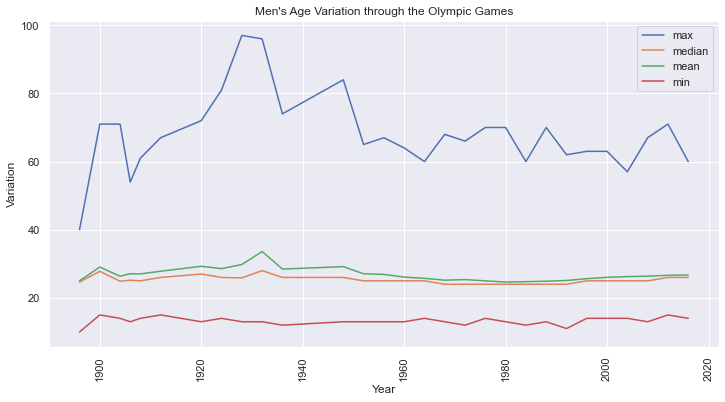

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(data=maleAgeVar,x=maleAgeVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=maleAgeVar,x=maleAgeVar.index, y='median', markers= ["o","<"],label='median')
sns.lineplot(data=maleAgeVar,x=maleAgeVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=maleAgeVar,x=maleAgeVar.index, y='min', markers= ["o","<"],label='min')
plt.xticks(rotation=90)
plt.title("Men's Age Variation through the Olympic Games")
plt.ylabel('Variation')
plt.show()

We can see that both the median (the middle value) and the mean (average) are quite constant over time. Also, we can see some great peaks around the 30s. As we read above, in the 1928 Los Angeles Olympic Games, for example, we registered the oldest Olympian, who participated in Art Competition. 

## 3.8 Variation of Age for Female Athletes over time

In [63]:
femaleAgeVar=olympicDataISO[olympicDataISO.Sex=='F'].groupby('Year')[['Age']].agg([min,np.mean,np.median,max])
femaleAgeVar=femaleAgeVar.Age
femaleAgeVar.head()

,min,mean,median,max
Year,,,,
1900,13.000000,30.010635,29.038462,46.000000
1904,24.000000,49.909375,55.000000,63.000000
1906,21.000000,25.234819,24.116906,29.038462
1908,19.414545,34.642863,36.000000,54.000000
1912,13.000000,22.411765,21.000000,45.000000


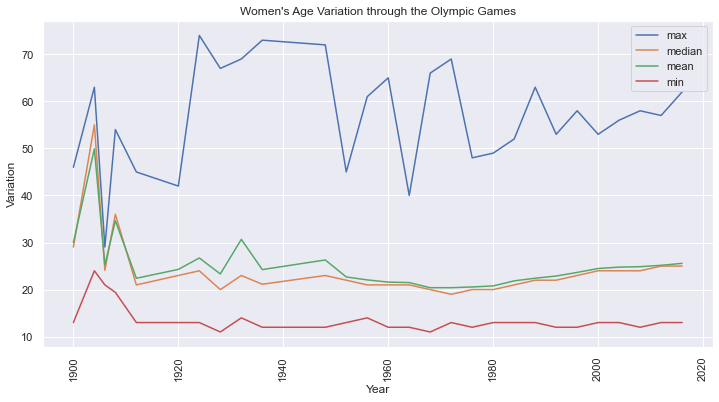

In [64]:
plt.figure(figsize=(12,6))
sns.lineplot(data=femaleAgeVar,x=femaleAgeVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=femaleAgeVar,x=femaleAgeVar.index, y='median', markers= ["o","<"],label='median')

sns.lineplot(data=femaleAgeVar,x=femaleAgeVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=femaleAgeVar,x=femaleAgeVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Women's Age Variation through the Olympic Games")
plt.ylabel('Variation')
plt.show()

For Women, we can see an increasing tendency in the average and median registered ages since the 1980 Moscow Olympic Games.

## 3.9 Variation of Weight for Male Athletes over time

What about the weight? How this measure has fluctuated over time?

* It's important to mention that, to take any substantial conclusion from this measure, we would have to divide by Events.

In [65]:
maleWeightVar=olympicDataISO[olympicDataISO.Sex=='M'].groupby('Year')[['Weight']].agg([min,np.mean,np.median,max])
maleWeightVar=maleWeightVar.Weight
maleWeightVar.head()

,min,mean,median,max
Year,,,,
1896,45.0,72.364564,70.963234,115.269896
1900,51.0,75.681802,76.173007,115.269896
1904,43.0,72.032654,69.970678,115.269896
1906,52.0,75.583481,75.778938,115.269896
1908,51.0,73.867432,74.000000,115.269896


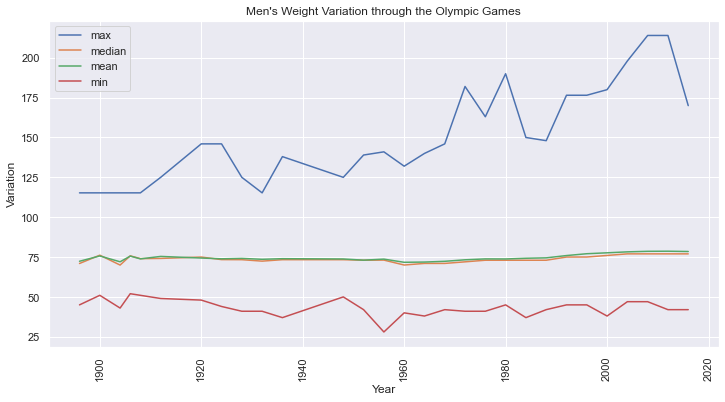

In [66]:
plt.figure(figsize=(12,6))
sns.lineplot(data=maleWeightVar,x=maleWeightVar.index, y='max', markers= ["o","<"],label='max')

sns.lineplot(data=maleWeightVar,x=maleWeightVar.index, y='median', markers= ["o","<"],label='median')
sns.lineplot(data=maleWeightVar,x=maleWeightVar.index, y='mean', markers= ["o","<"],label='mean')

sns.lineplot(data=maleWeightVar,x=maleWeightVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Men's Weight Variation through the Olympic Games")
plt.ylabel('Variation')

plt.show()

We can see that both the median (the middle value) and the mean (average) are showing a slight increase over the last 20 years.

## 3.10 Variation of Weight for Female Athletes over time

In [67]:
womenWeightVar=olympicDataISO[olympicDataISO.Sex=='F'].groupby('Year')[['Weight']].agg([min,np.mean,np.median,max])
womenWeightVar=womenWeightVar.Weight
womenWeightVar.head()

,min,mean,median,max
Year,,,,
1900,61.979466,67.837673,67.648002,76.509324
1904,69.970678,69.970678,69.970678,69.970678
1906,61.979466,67.169175,61.979466,73.396825
1908,51.119403,67.111217,69.970678,77.000000
1912,61.674173,64.688523,61.979466,73.396825


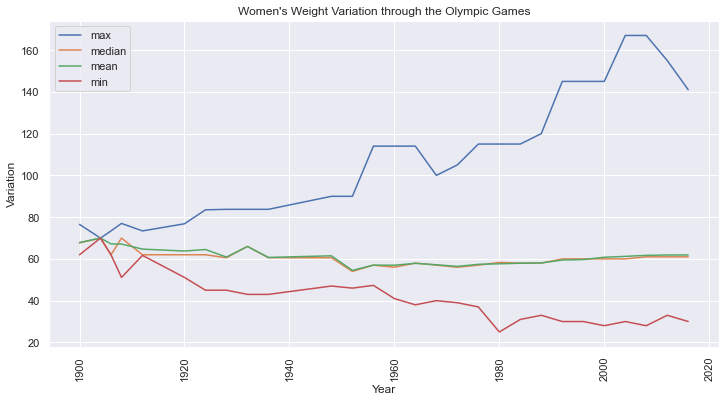

In [68]:
plt.figure(figsize=(12,6))
sns.lineplot(data=womenWeightVar,x=womenWeightVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=womenWeightVar,x=womenWeightVar.index, y='median', markers= ["o","<"],label='median')

sns.lineplot(data=womenWeightVar,x=womenWeightVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=womenWeightVar,x=womenWeightVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Women's Weight Variation through the Olympic Games")
plt.ylabel('Variation')
plt.show()

Same as Age, Women athletes are showing a slight increase in terms of mean and median in weight over the last 40 years.

In a further study, this value would have to be compared with the number of women's events over time, and see if there is any correlation. In a rough analysis, we can say this would make sense.

## 3.11 Variation of Height for Male Athletes over time

In [69]:
maleHeightVar=olympicDataISO[olympicDataISO.Sex=='M'].groupby('Year')[['Height']].agg([min,np.mean,np.median,max])
maleHeightVar=maleHeightVar.Height
maleHeightVar.head()

,min,mean,median,max
Year,,,,
1896,154.0,174.524546,173.937657,190.640466
1900,153.0,177.241113,178.345624,191.000000
1904,155.0,175.113520,173.000000,195.000000
1906,165.0,177.634190,177.558979,196.000000
1908,157.0,176.667051,177.146789,201.000000


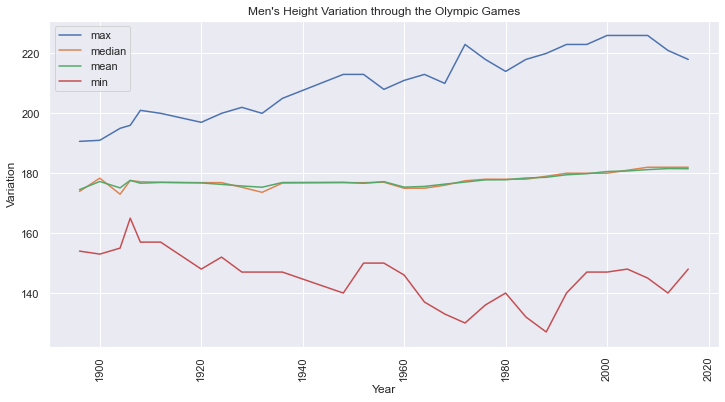

In [70]:
plt.figure(figsize=(12,6))
sns.lineplot(data=maleHeightVar,x=maleHeightVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=maleHeightVar,x=maleHeightVar.index, y='median', markers= ["o","<"],label='median')

sns.lineplot(data=maleHeightVar,x=maleHeightVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=maleHeightVar,x=maleHeightVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Men's Height Variation through the Olympic Games")
plt.ylabel('Variation')
plt.show()

We can see that both the median (the middle value) and the mean (average) show an increasing tendency over time.

This could mean that the athletes' population is getting taller.

## 3.12 Variation of Height for Female Athletes over time

In [71]:
womenHeightVar=olympicDataISO[olympicDataISO.Sex=='F'].groupby('Year')[['Height']].agg([min,np.mean,np.median,max])
womenHeightVar=womenHeightVar.Height
womenHeightVar.head()

,min,mean,median,max
Year,,,,
1900,166.000000,173.287562,172.244399,180.771429
1904,173.086088,173.086088,173.086088,173.086088
1906,172.244399,176.120322,172.244399,180.771429
1908,161.313351,172.653574,173.086088,181.000000
1912,156.833333,171.575757,172.244399,180.771429


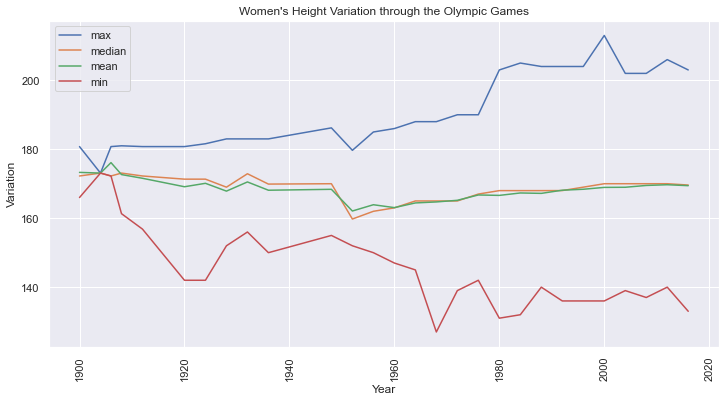

In [72]:
plt.figure(figsize=(12,6))
sns.lineplot(data=womenHeightVar,x=womenHeightVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=womenHeightVar,x=womenHeightVar.index, y='median', markers= ["o","<"],label='median')

sns.lineplot(data=womenHeightVar,x=womenHeightVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=womenHeightVar,x=womenHeightVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Women's Height Variation through the Olympic Games")
plt.ylabel('Variation')

plt.show()

## 3.13 Weight over year for Male Gymnasts

In [73]:
maleWeightGymVar=olympicDataISO[(olympicDataISO.Sex=='M') & (olympicDataISO.Sport=='Gymnastics')].groupby('Year')[['Weight']].agg([min,np.mean,np.median,max])
maleWeightGymVar=maleWeightGymVar.Weight
maleWeightGymVar.head()

,min,mean,median,max
Year,,,,
1896,56.000000,64.846540,63.359364,102.0
1900,61.000000,63.368068,63.348624,71.0
1904,58.166601,66.522063,69.500000,77.0
1906,59.000000,68.786599,63.348624,82.0
1908,54.000000,63.288332,63.133305,86.0


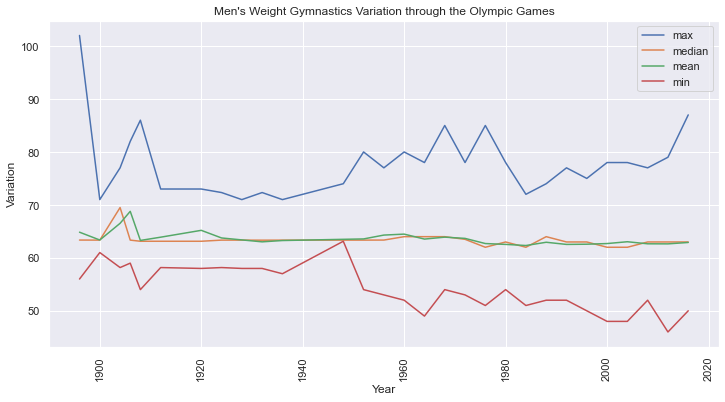

In [74]:
plt.figure(figsize=(12,6))

sns.lineplot(data=maleWeightGymVar,x=maleWeightGymVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=maleWeightGymVar,x=maleWeightGymVar.index, y='median', markers= ["o","<"],label='median')
sns.lineplot(data=maleWeightGymVar,x=maleWeightGymVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=maleWeightGymVar,x=maleWeightGymVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Men's Weight Gymnastics Variation through the Olympic Games")
plt.ylabel('Variation')

plt.show()

We can see that both the median (the middle value) and the mean (average) are quite constant over time, despite the maximum and minimum weights aren't.

## 3.14 Weight over year for Female Gymnasts

In [75]:
femaleWeightGymVar=olympicDataISO[(olympicDataISO.Sex=='F') & (olympicDataISO.Sport=='Gymnastics')].groupby('Year')[['Weight']].agg([min,np.mean,np.median,max])
femaleWeightGymVar=femaleWeightGymVar.Weight
femaleWeightGymVar.head()

,min,mean,median,max
Year,,,,
1928,47.322404,47.322404,47.322404,47.322404
1936,43.000000,48.129554,47.322404,62.000000
1948,47.322404,47.456815,47.322404,57.000000
1952,47.322404,49.974987,47.867324,63.000000
1956,47.322404,51.637523,50.000000,61.000000


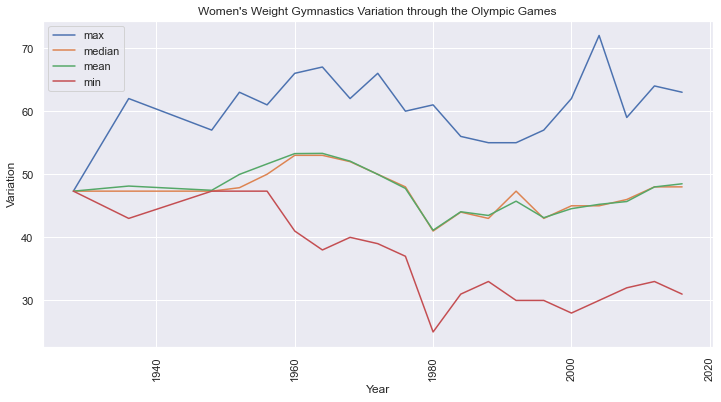

In [76]:
plt.figure(figsize=(12,6))

sns.lineplot(data=femaleWeightGymVar,x=femaleWeightGymVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=femaleWeightGymVar,x=femaleWeightGymVar.index, y='median', markers= ["o","<"],label='median')
sns.lineplot(data=femaleWeightGymVar,x=femaleWeightGymVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=femaleWeightGymVar,x=femaleWeightGymVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Women's Weight Gymnastics Variation through the Olympic Games")
plt.ylabel('Variation')

plt.show()

These figures are pretty interesting. We see that there is huge volatility in the weight of women gymnastic athletes over time.

## 3.15 Height over year for Male Lifters

In the case of WeightLifting, makes no sense to analyze the weight in a generic way. This is because it must be contextualized inside each Event/Category, which, by the way, also changes through time, as IF Rules change.

That is why it would be interesting analyzing the Height over the years.

In [77]:
maleheightWLFVar=olympicDataISO[(olympicDataISO.Sex=='M') & (olympicDataISO.Sport=='Weightlifting')].groupby('Year')[['Height']].agg([min,np.mean,np.median,max])
maleheightWLFVar=maleheightWLFVar.Height
maleheightWLFVar.head()

,min,mean,median,max
Year,,,,
1896,159.000000,175.385714,174.357143,188.000000
1904,170.000000,172.448980,172.714286,176.000000
1906,170.000000,174.012987,175.000000,177.000000
1920,160.714777,167.762877,167.000000,179.680751
1924,160.714777,168.927445,169.072848,179.680751


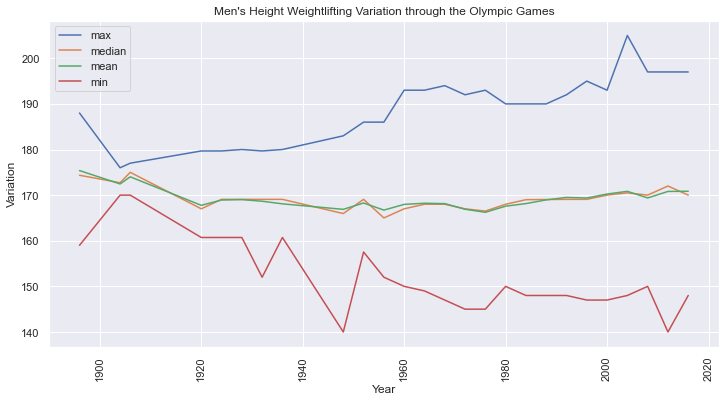

In [78]:
plt.figure(figsize=(12,6))

sns.lineplot(data=maleheightWLFVar,x=maleheightWLFVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=maleheightWLFVar,x=maleheightWLFVar.index, y='median', markers= ["o","<"],label='median')
sns.lineplot(data=maleheightWLFVar,x=maleheightWLFVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=maleheightWLFVar,x=maleheightWLFVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Men's Height Weightlifting Variation through the Olympic Games")
plt.ylabel('Variation')

plt.show()

It's interesting how the maximum height increased (we would need to analyze if this value is also correlated with an increase in the weight). Also, the mean and the median have U shapes.

The wider range shown since the 1980 Moscow Olympic Games, might mean that the number of categories was expanded over time, and/or, the range of the categories was increased.

## 3.16 Height over year for Female Lifters


In [79]:
femaleheightWLFVar=olympicDataISO[(olympicDataISO.Sex=='F') & (olympicDataISO.Sport=='Weightlifting')].groupby('Year')[['Height']].agg([min,np.mean,np.median,max])
femaleheightWLFVar=femaleheightWLFVar.Height
femaleheightWLFVar.head()

,min,mean,median,max
Year,,,,
2000,145.0,160.717647,161.0,180.0
2004,145.0,160.676827,160.0,181.0
2008,141.0,160.206897,160.0,181.0
2012,142.0,160.169279,160.0,190.0
2016,145.0,160.611650,160.0,178.0


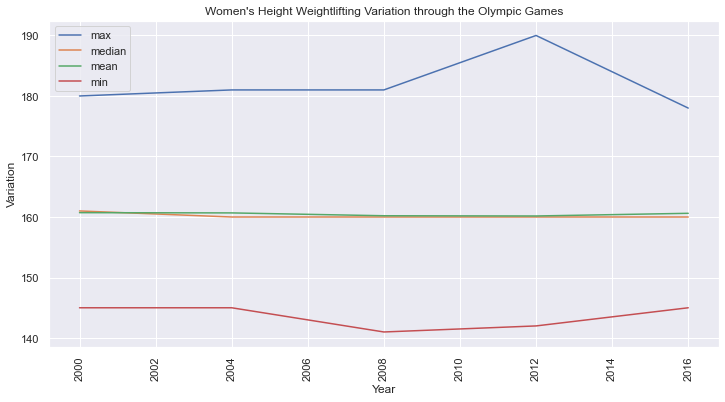

In [80]:
plt.figure(figsize=(12,6))

sns.lineplot(data=femaleheightWLFVar,x=femaleheightWLFVar.index, y='max', markers= ["o","<"],label='max')
sns.lineplot(data=femaleheightWLFVar,x=femaleheightWLFVar.index, y='median', markers= ["o","<"],label='median')
sns.lineplot(data=femaleheightWLFVar,x=femaleheightWLFVar.index, y='mean', markers= ["o","<"],label='mean')
sns.lineplot(data=femaleheightWLFVar,x=femaleheightWLFVar.index, y='min', markers= ["o","<"],label='min')

plt.xticks(rotation=90)
plt.title("Women's Height Weightlifting Variation through the Olympic Games")
plt.ylabel('Variation')

plt.show()

We can see that both the median (the middle value) and the mean (average) are quite constant over time.

## 3.17 World Maps

Let's plot in world maps the medals distribution per color/type.

* There are countries that are not even plotted. This is because they have never won that color/type of medal.

In [81]:
###CODE###
nocMedalsOrder=olympicDataISO.groupby(['NOC','ISO','Medal','MedalNumeric'])[['ID']].count().sort_values(['NOC','MedalNumeric'])
nocMedalsOrder.rename(columns={'ID':'Count'},inplace=True)
medalsDF=nocMedalsOrder.reset_index().pivot(index=['NOC','ISO'], columns='Medal', values='Count').fillna(0).astype(int)
medalsDF=medalsDF.loc[:,['Bronze','Silver','Gold']]
medalsDF['Total']=medalsDF['Bronze']+medalsDF['Silver']+medalsDF['Gold']
medalsDF=medalsDF.reset_index()
medalsDF=medalsDF.sort_values(['Gold','Silver','Bronze','Total'],ascending=False)

### 3.17.1 Gold Medals based on Countries

In [82]:
df=medalsDF[medalsDF.Gold>0]
###CODE###
data = [dict(
    type='choropleth',
    locations=df['ISO'],
    z=df['Gold'],
    color_continuous_scale=px.colors.sequential.Plasma,
    text=df.apply(lambda row: f"{row['NOC']}<br>Total Medals: {row['Total']}<br>Gold Medals: {row['Gold']}<br>Silver Medals: {row['Silver']}<br>Bronze Medals: {row['Bronze']}", axis=1),
    hoverinfo="text",
    #autocolorscale=False,
    reversescale=True,
    colorscale = 'Blues',
    marker=dict(
        line=dict(
            color='rgb(180,180,180)',
            width=0.5
        )),
    colorbar=dict(
        autotick=False,
        tickprefix='',
        title='Gold'),
)]

layout = dict(
    colorscale = 'Blues',
    width=900,
    height=600,
    title="GOLD Medallists' NOCs",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection=dict(
            type='Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)

iplot(fig,validate=False)


### 3.17.2 Silver Medals based on Countries

In [83]:
df=medalsDF[medalsDF.Silver>0]
###CODE###
data = [dict(
    type='choropleth',
    locations=df['ISO'],
    z=df['Silver'],
    color_continuous_scale=px.colors.sequential.Plasma,
    text=df.apply(lambda row: f"{row['NOC']}<br>Total Medals: {row['Total']}<br>Gold Medals: {row['Gold']}<br>Silver Medals: {row['Silver']}<br>Bronze Medals: {row['Bronze']}", axis=1),
    hoverinfo="text",
    #autocolorscale=False,
    reversescale=True,
    colorscale = 'Greens',
    marker=dict(
        line=dict(
            color='rgb(180,180,180)',
            width=0.5
        )),
    colorbar=dict(
        autotick=False,
        tickprefix='',
        title='Silver'),
)]

layout = dict(
    colorscale = 'Blues',
    width=900,
    height=600,
    title="SILVER Medallists' NOCs",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection=dict(
            type='Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)

iplot(fig,validate=False)


### 3.17.3 Bronze Medals based on Countries


In [84]:
df=medalsDF[medalsDF.Bronze>0]
###CODE###
data = [dict(
    type='choropleth',
    locations=df['ISO'],
    z=df['Bronze'],
    #color_continuous_scale=px.colors.sequential.Plasma,
    text=df.apply(lambda row: f"{row['NOC']}<br>Total Medals: {row['Total']}<br>Gold Medals: {row['Gold']}<br>Silver Medals: {row['Silver']}<br>Bronze Medals: {row['Bronze']}", axis=1),
    hoverinfo="text",
    #autocolorscale=False,
    #reversescale=True,
    colorscale = 'Yellows',
    marker=dict(
        line=dict(
            color='rgb(180,180,180)',
            width=0.5
        )),
    colorbar=dict(
        autotick=False,
        tickprefix='',
        title='Bronze'),
)]

layout = dict(
    colorscale = 'Gold',
    width=900,
    height=600,
    title="BRONZE Medallists' NOCs",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection=dict(
            type='Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)

iplot(fig,validate=False)


# 4. Summary
We found some interesting hindsight. Why hindsight? Because they were there, maybe we just never paid attention.

- Some interesting sports were part of the Olympic program
- The Olympic Games were always held every 4 years, with exception of the World Wars and the COVID pandemic. However, we find an Olympic Games in 1906, while there were also Olympic Games in 1904 and 1908. These were called 'The 1906 Intercalated Games' . These Games were held by the IOC, but later they were unrecognized.
- The oldest Olympian ever, John Quincy Adams Ward, participated in the 1928 Olympics post-mortem. In reality, his art participated but not him personally.
- Most of the Olympians are between 21 and 29 years old.
- We can see that the Gold Medalist's Age concentration is mainly between 19 and 26 years.
- The men athletes' population is getting taller.


Did you like it? What questions would you do to this dataset?

Thanks for reading!